# 🛳️ Titanic - Top 1% with KNN [0.81818]

> #### Check out my other cool notebook !
> - [🛳️ Titanic EDA and Prediction [0.78229]](https://www.kaggle.com/code/dreygaen/titanic-eda-and-prediction-0-78229)

# 📋 Table of contents

- [🎓 Context](#🎓-Context)
- [🛠️ Project Setup](#🛠️-Project-Setup)
- [💾 Loading Data](#💾-Loading-Data)
- [⚙️ Feature Engineering](#⚙️-Feature-Engineering)
    - [Imputing Age](#Imputing-Age)
    - [Family Size](#Family-Size)
    - [Family Survival Status](#Family-Survival-Status)
    - [Fare](#Fare)
    - [Age](#Age)
    - [Sex](#Sex)
    - [Clean unused data](#Clean-unused-data)
- [🤖 Predictive Modeling](#🤖-Predictive-Modeling)
    - [Training](#Training)
        - [Creating X and y](#Creating-X-and-y)
        - [Scaling features](#Scaling-features)
        - [Hyperparameters tuning](#Hyperparameters-tuning)
    - [Predicting](#Predicting)
        - [Model found by Grid Searching](#Model-found-by-Grid-Searching)
        - [Another model with less neighbors](#Another-model-with-less-neighbors)
        - [Confusion matrixes](#Confusion-matrixes)
        - [Feature Importance](#Feature-Importance)
        - [Clusters](#Clusters)
- [🥇 Place in the leaderboard](#🥇-Place-in-the-leaderboard)
- [📤 Submission](#📤-Submission)
- [📝 Note of the author](#📝-Note-of-the-author)
- [👏 Credits](#👏-Credits)

# 🎓 Context

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, they ask us to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

![Titanic](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/front_page.png)

# 🛠️ Project Setup

This code block imports the necessary libraries for data preprocessing and modeling in Python. Specifically, it imports **NumPy**, **Pandas**, **Seaborn**, and **Matplotlib** for data manipulation and visualization. Scikit-learn modules such as **LabelEncoder**, **StandardScaler**, **GridSearchCV**, **KNeighborsClassifier**, **cross_val_predict**, **confusion_matrix**, **permutation_importance**, **train_test_split**, and **PCA** are also imported for data preprocessing, model training, and evaluation. The **Counter** module from the collections library is imported for counting the number of occurrences of each item in a list.

The code block also uses **os** to print out the file paths for any files located in the input directory. This is useful for confirming that the dataset for the Titanic sinking competition is present and accessible in the directory.

Overall, this code block sets up the necessary environment for data preprocessing and modeling using Python and scikit-learn.

In [1]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic-leaderboard/titanic-publicleaderboard.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 💾 Loading Data

This code block reads in the training and test data for the Titanic sinking competition from CSV files located in the input directory. It uses **Pandas' read_csv()** function to read in the data and store it as a DataFrame.

The *train_df* DataFrame contains the training data, which includes features such as passenger class, age, and sex, as well as the target variable of survival status. The *test_df* DataFrame contains the test data, which includes the same features as the training data, but the target variable of survival status is not included.

The last line of code appends the test data to the training data to create a single DataFrame called *data_df*. This is often done in data preprocessing to allow for consistent feature engineering and transformation across the entire dataset.

In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")
data_df = train_df.append(test_df)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ⚙️ Feature Engineering

We are directly diving into feature engineering in this notebook as my Titanic's EDA can be found [here](https://www.kaggle.com/code/dreygaen/titanic-eda-and-prediction-0-78229).

## Imputing Age

This code block performs data preprocessing steps to extract and clean the *Title* feature from the *Name* feature of the data_df DataFrame.

First, a new empty column called *Title* is added to the DataFrame using **data_df['Title'] = ''**.

Next, a **for loop** is used to iterate through each name string in the *Name* feature of the DataFrame. The **str.extract()** method is then used to extract the title from the name string using a regular expression. The resulting title is stored in the *Title* column of the corresponding row in the DataFrame.

The code then replaces rare titles with more common ones using a predefined mapping dictionary. The titles included in the mapping are *'Mlle'*, *'Major'*, *'Col'*, *'Sir'*, *'Don'*, *'Mme'*, *'Jonkheer'*, *'Lady'*, *'Capt'*, *'Countess'*, *'Ms'*, and *'Dona'*.

After mapping the titles, the code calculates the median age for each title group and imputes missing age values in the DataFrame based on the title of the corresponding passenger.

Finally, the code substitutes the imputed age values back into the original training and test DataFrames using indexing. The *Title* feature is then dropped from the data_df DataFrame using the **drop()** method.

Overall, this code block performs an important step in feature engineering by extracting meaningful information from the *Name* feature and using it to impute missing age values in the dataset.

In [6]:
data_df['Title'] = ''

# Cleaning name and extracting Title
for name_string in data_df['Name']:
    data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# Replacing rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

data_df.replace({'Title': mapping}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']

for title in titles:
    age_to_impute = data_df.groupby('Title')['Age'].median()[titles.index(title)]
    data_df.loc[(data_df['Age'].isnull()) & (data_df['Title'] == title), 'Age'] = age_to_impute
    
# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Age'] = data_df['Age'][:891]
test_df['Age'] = data_df['Age'][891:]

# Dropping Title feature
data_df.drop('Title', axis = 1, inplace = True)

In [7]:
data_df.Age.isna().sum()

0

## Family Size

This code block calculates the *Family_Size* feature by adding the *Parch* (number of parents or children aboard) and *SibSp* (number of siblings or spouses aboard) features together for each passenger in the data_df DataFrame. The resulting values are stored in a new column called *Family_Size*.

The code then substitutes the *Family_Size* values back into the original training and test DataFrames using indexing. This feature could be used to infer information about the passenger's social status or support network aboard the Titanic, which could be useful in predicting survival status.

In [8]:
data_df['Family_Size'] = data_df['Parch'] + data_df['SibSp']

# Substituting Age values in TRAIN_DF and TEST_DF:
train_df['Family_Size'] = data_df['Family_Size'][:891]
test_df['Family_Size'] = data_df['Family_Size'][891:]

In [9]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Family Survival Status

This block of code creates a new feature called *Family_Survival* that attempts to infer the survival status of a passenger's family based on their shared ticket number, last name, and fare. The code first creates a new column called *Lastname* by extracting the last name from the *Name* column using the lambda function and the **split()** method.

The missing *Fare* values are then replaced with the mean fare value using the **fillna()** method. The default survival value is set to **0.5**, which is used to initialize the *Family_Survival* column.

Next, the code iterates over each family group (identified by shared *Last_Name* and *Fare* values) in the *data_df* DataFrame using the **groupby()** method. For each family group, the code checks whether any family member has survived or perished. If at least one family member has survived, then the *Family_Survival* value for all family members in the group is set to **1**. If all family members have perished, then the *Family_Survival* value is set to **0** for all members. If the group only has one member, the *Family_Survival* value remains at its default value of **0.5**.

The last line of code prints the number of passengers for which the *Family_Survival* value is **not 0.5**, indicating that family survival information is available for those passengers.

In [10]:
data_df['Lastname'] = data_df['Name'].apply(lambda x: str.split(x, ",")[0])
data_df['Fare'].fillna(data_df['Fare'].mean(), inplace=True)

DEFAULT_SURVIVAL_VALUE = 0.5
data_df['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

for grp, grp_df in data_df[['Survived','Name', 'Lastname', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Lastname', 'Fare']):
    
    if (len(grp_df) != 1):
        # A Family group is found.
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0

print("Number of passengers with family survival information:", 
      data_df.loc[data_df['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


This block of code is aimed at imputing missing information about the survival of family members and groups. The code creates a new feature called *Family_Survival* and initially sets its value to *DEFAULT_SURVIVAL_VALUE* which is equal to **0.5**. It then uses the passenger's last name, fare, and ticket number to identify family groups. For each family group, it checks if there is any missing survival information (either **0** or **0.5**) and if so, it imputes this information based on the survival of other family members in the group. It then repeats this process for groups of passengers with the same ticket number. Finally, it updates the *Family_Survival* feature for both the training and test datasets based on the information found in the *data_df* dataframe. The code also prints out the number of passengers for which family/group survival information was found.

In [11]:
for _, grp_df in data_df.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data_df.loc[data_df['PassengerId'] == passID, 'Family_Survival'] = 0
                        
print("Number of passenger with family/group survival information: " 
      +str(data_df[data_df['Family_Survival']!=0.5].shape[0]))

# # Family_Survival in TRAIN_DF and TEST_DF:
train_df['Family_Survival'] = data_df['Family_Survival'][:891]
test_df['Family_Survival'] = data_df['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


In [12]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Lastname,Family_Survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Futrelle,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Allen,0.5


## Fare

The code above prepares the *Fare* feature by filling missing values with the **median**, binning the feature using **pd.qcut**, and encoding the bin labels with a **LabelEncoder**. It then assigns the bin codes to the corresponding rows in the *train_df* and *test_df* dataframes, and drops the original *Fare* column from both dataframes.

The **pd.qcut** function divides the range of values in the Fare column into **5 bins** with equal number of observations. This is done to reduce the noise in the data and to capture the patterns in the data that may not be apparent when looking at the raw values.

The **LabelEncoder** is used to transform the categorical bin labels into numerical values that can be used as input for the machine learning models. The encoded values range from **0** to **4**, corresponding to the **5 bins** generated by **pd.qcut**.

In [13]:
data_df['Fare'].fillna(data_df['Fare'].median(), inplace = True)

# Making Bins
data_df['FareBin'] = pd.qcut(data_df['Fare'], 5)

label = LabelEncoder()
data_df['FareBin_Code'] = label.fit_transform(data_df['FareBin'])

train_df['FareBin_Code'] = data_df['FareBin_Code'][:891]
test_df['FareBin_Code'] = data_df['FareBin_Code'][891:]

train_df.drop(columns='Fare', inplace=True)
test_df.drop(columns='Fare', inplace=True)

In [14]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Lastname,Family_Survival,FareBin,FareBin_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,0.5,"(-0.001, 7.854]",0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Cumings,0.5,"(41.579, 512.329]",4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen,0.5,"(7.854, 10.5]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Futrelle,0.0,"(41.579, 512.329]",4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Allen,0.5,"(7.854, 10.5]",1


## Age

Here, we are performing a binning of the *Age* feature into **4 bins** using the qcut method of Pandas, and then labeling the bins using **LabelEncoder**. The resulting *AgeBin_Code* column is then added to the *data_df* DataFrame. Finally, the *AgeBin_Code* column is extracted for the training and testing datasets, and the original *Age* column is dropped from both.

In [15]:
data_df['AgeBin'] = pd.qcut(data_df['Age'], 4)

label = LabelEncoder()
data_df['AgeBin_Code'] = label.fit_transform(data_df['AgeBin'])

train_df['AgeBin_Code'] = data_df['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = data_df['AgeBin_Code'][891:]

train_df.drop(columns='Age', inplace=True)
test_df.drop(columns='Age', inplace=True)

In [16]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Lastname,Family_Survival,FareBin,FareBin_Code,AgeBin,AgeBin_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,0.5,"(-0.001, 7.854]",0,"(0.169, 22.0]",0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Cumings,0.5,"(41.579, 512.329]",4,"(36.0, 80.0]",3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen,0.5,"(7.854, 10.5]",1,"(22.0, 30.0]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Futrelle,0.0,"(41.579, 512.329]",4,"(30.0, 36.0]",2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Allen,0.5,"(7.854, 10.5]",1,"(30.0, 36.0]",2


## Sex

These lines of code replace the **male** and **female** values in the *Sex* column of the *train_df* and *test_df* dataframes with **0** and **1**, respectively. This is done to convert the categorical *Sex* feature into a numerical one so that machine learning models can be trained on the data.

In [17]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,NaN,S,1,0.5,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,C85,C,1,0.5,4,3
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,NaN,S,0,0.5,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,C123,S,1,0.0,4,2
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,NaN,S,0,0.5,1,2


## Clean unused data

This code drops several columns from the *train_df* and *test_df* dataframes that are not needed for training or testing the model. Specifically, the columns being dropped are:

- *Name* : Names of passengers
- *PassengerId* : Unique IDs of passengers
- *SibSp* : Number of siblings/spouses aboard the Titanic
- *Parch* : Number of parents/children aboard the Titanic
- *Ticket* : Ticket number of passengers
- *Cabin* : Cabin number of passengers
- *Embarked* : Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

These columns have been dropped as they are not expected to contribute much to the prediction of the survival of passengers, and including them in the model could potentially add unnecessary noise to the training process.

In [19]:
train_df.drop(columns=['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], inplace = True)
test_df.drop(columns=['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], inplace = True)

In [20]:
train_df.head()

,Survived,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,0,3,0,1,0.5,0,0
1,1,1,1,1,0.5,4,3
2,1,3,1,0,0.5,1,1
3,1,1,1,1,0.0,4,2
4,0,3,0,0,0.5,1,2


# 🤖 Predictive Modeling

As I already tried other predictive modeling algorithms [here](https://www.kaggle.com/code/dreygaen/titanic-eda-and-prediction-0-78229), I will only focus on the K-Nearest Neighbors classifier algorithm in this notebook.

## Training

Let's start by the training phase of our predictive model.

### Creating X and y

The code below is splitting the training dataset *train_df* into two sets - *X* and *y*.

- *X* contains all the features (columns) of the training dataset except for the target variable, *Survived*.

- *y* is the target variable, *Survived*, and is a one-dimensional array or series that contains the corresponding class labels for each row in *X*.

The *test_df* dataset is also copied to *X_test* so that it can be used for predictions later on.

In [21]:
X = train_df.drop(columns='Survived')
y = train_df['Survived']
X_test = test_df.copy()

In [22]:
pd.DataFrame(X).head()

,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,3,0,1,0.5,0,0
1,1,1,1,0.5,4,3
2,3,1,0,0.5,1,1
3,1,1,1,0.0,4,2
4,3,0,0,0.5,1,2


In [23]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### Scaling features

The code standardizes the numerical features in the training and test datasets using **StandardScaler()** from the **scikit-learn** library. Standardization involves transforming the data so that it has a **mean of 0** and a **standard deviation of 1**.

The **fit_transform()** method of the scaler is called on the training set *X* to compute the mean and standard deviation for each feature and then transform the data. The **transform()** method is then called on the test set *X_test* to apply the same transformation, but using the mean and standard deviation computed on the training set.

Standardizing the data can help improve the performance of some machine learning models, particularly those that are sensitive to the scale of the input features, such as logistic regression or support vector machines.

In [24]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

In [25]:
pd.DataFrame(X).head()

,0,1,2,3,4,5
0,0.827377,-0.737695,0.059160,-0.060661,-1.407144,-1.143781
1,-1.566107,1.355574,0.059160,-0.060661,1.429429,1.540439
2,0.827377,1.355574,-0.560975,-0.060661,-0.698001,-0.249041
3,-1.566107,1.355574,0.059160,-1.604923,1.429429,0.645699
4,0.827377,-0.737695,-0.560975,-0.060661,-0.698001,0.645699


### Hyperparameters tuning

This code is performing a grid search using cross-validation to find the best hyperparameters for a K-Nearest Neighbors classifier. The hyperparameters being searched over are:

- *algorithm* : the algorithm used to compute the nearest neighbors
- *weights* : the weighting function used in prediction
- *leaf_size* : the size of the leaf in the KD tree
- *n_neighbors* : the number of neighbors to use for classification

The grid search is performed using 10-fold cross-validation, with the **roc_auc** scoring metric. Once the grid search is complete, the best score and best hyperparameters are printed out.

In [26]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")

gd.fit(X, y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
0.8790514387573211
{'algorithm': 'auto', 'leaf_size': 16, 'n_neighbors': 18, 'weights': 'uniform'}


## Predicting

Let's see how well our KNN model performs on the public test dataset.

### Model found by Grid Searching

This code fits the best estimator found by the grid search cross-validation on the training data (*X* and *y*). Then, it uses the fitted model to make predictions on the test data *X_test* and stores the predictions in *y_pred*. The *y_pred* variable contains the predicted binary labels for the survival of each passenger in the test set.

In [27]:
gd.best_estimator_.fit(X, y)
y_pred = gd.best_estimator_.predict(X_test)

In [28]:
pd.DataFrame(y_pred).head()

,0
0,0
1,1
2,0
3,0
4,1


- ***Public score*** : 0.81578

### Another model with less neighbors

Messing around with less neighbors seems to increase our public score, so here is the final model.

In [29]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(X, y)
y_pred = knn.predict(X_test)

In [30]:
pd.DataFrame(y_pred).head()

,0
0,0
1,0
2,0
3,0
4,1


- ***Public score*** : 0.81818

### Confusion matrixes

This code is generating two confusion matrices using **Seaborn**'s heatmap function.

First, it is using **cross_val_predict** function from **sklearn.model_selection** to generate predicted target values for the given **KNeighborsClassifier** model with hyperparameters *algorithm*, *leaf_size*, *metric*, *n_neighbors*, *p*, and *weights*.

Then, it generates the confusion matrix using sklearn's confusion_matrix function on the actual target values and the predicted target values.

Finally, it plots both confusion matrices side-by-side using **Seaborn**'s heatmap function with annotations and custom titles for each matrix.

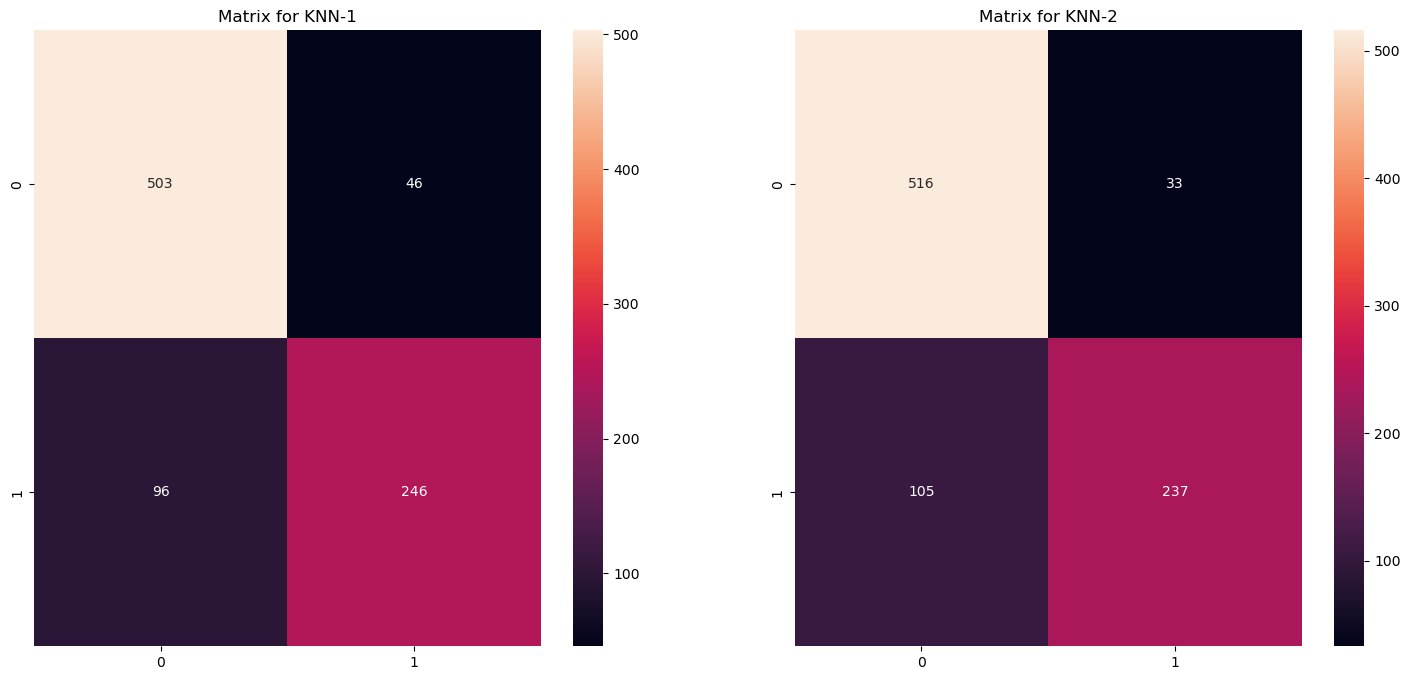

In [31]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

y_cross = cross_val_predict(KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                            metric_params=None, n_jobs=1, n_neighbors=22, p=2,
                            weights='uniform'), X, y, cv=10) 
sns.heatmap(confusion_matrix(y, y_cross), ax=ax[0], annot=True, fmt='2.0f') 
ax[0].set_title('Matrix for KNN-1')

y_cross = cross_val_predict(KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform'), X, y, cv=10) 
sns.heatmap(confusion_matrix(y, y_cross), ax=ax[1], annot=True, fmt='2.0f') 
ax[1].set_title('Matrix for KNN-2')

plt.show()

### Feature Importance

This code fits two KNN classifiers with different hyperparameters on a train-validation split of the Titanic dataset, and then calculates and plots the permutation feature importance for each of them. Here's a breakdown of the code: Firstly, our two KNN classifiers are instantiated.

In [32]:
knn_1 = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski',
                            metric_params=None, n_jobs=1, n_neighbors=22, p=2,
                            weights='uniform')

knn_2 = KNeighborsClassifier(algorithm='auto', leaf_size=16, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')

A train-validation split is performed on the Titanic dataset.

In [33]:
train, val = train_test_split(train_df, test_size=0.3, random_state=0, stratify=train_df['Survived'])
train_X = train[train.columns[1:]]
train_y = train[train.columns[:1]]
test_X = val[val.columns[1:]]
test_y = val[val.columns[:1]]

The two KNN classifiers are fitted on the training data.

In [34]:
knn_1.fit(train_X, train_y.values.ravel())
knn_2.fit(train_X, train_y.values.ravel())

KNeighborsClassifier(leaf_size=16, n_jobs=1, n_neighbors=6)

The permutation feature importance is calculated for each classifier using the validation set.

In [35]:
result_1 = permutation_importance(knn_1, test_X, test_y, n_repeats=10, random_state=0)
result_2 = permutation_importance(knn_2, test_X, test_y, n_repeats=10, random_state=0)

The feature importance for each classifier is plotted using a seaborn barplot.

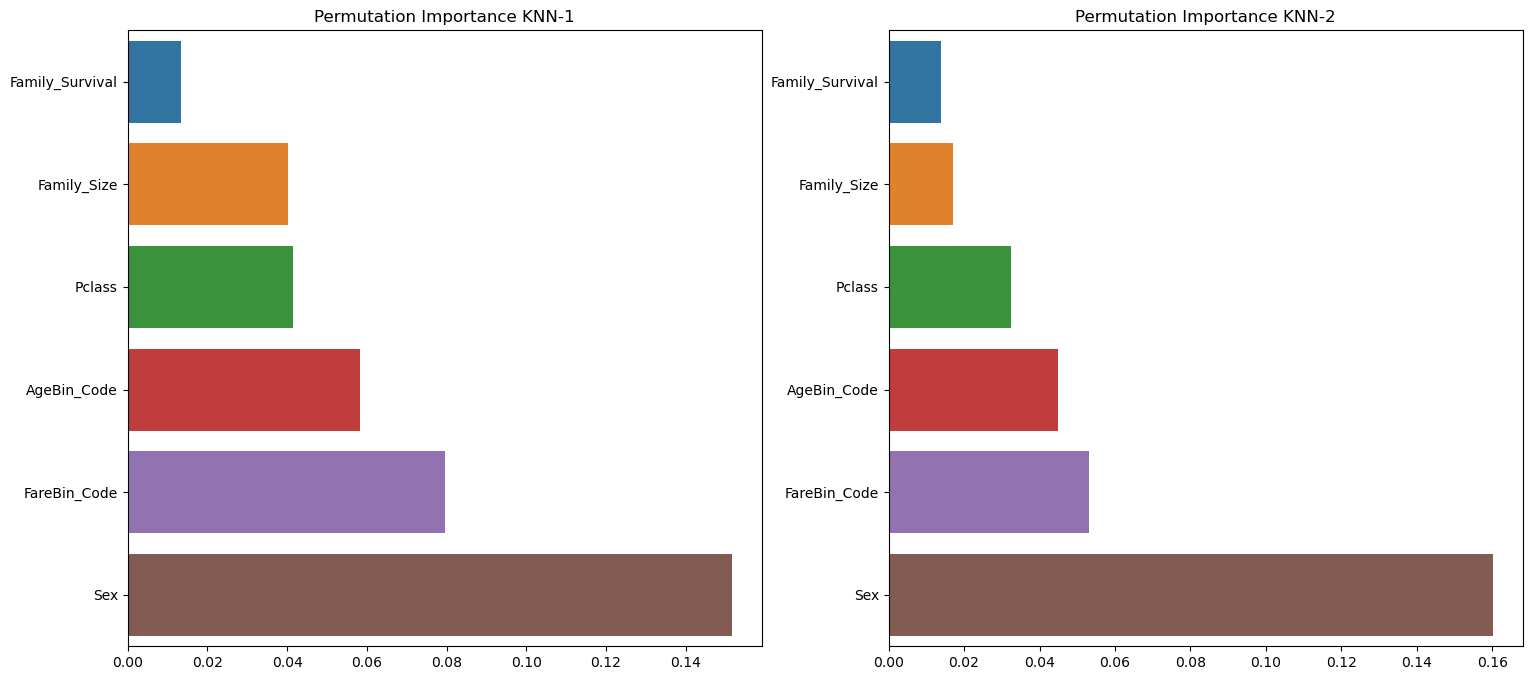

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.barplot(y=test_X.columns[result_1.importances_mean.argsort()], x=result_1.importances_mean[result_1.importances_mean.argsort()], ax=ax[0])
ax[0].set_title("Permutation Importance KNN-1")

sns.barplot(y=test_X.columns[result_2.importances_mean.argsort()], x=result_2.importances_mean[result_2.importances_mean.argsort()], ax=ax[1])
ax[1].set_title("Permutation Importance KNN-2")

plt.show()

### Clusters

In this code block, we are first using the trained KNN classifiers *knn_1* and *knn_2* to make predictions on the test data *test_X*. The predicted labels are stored in *y_pred_1* and *y_pred_2*.

Next, we are using Principal Component Analysis (PCA) to reduce the dimensionality of the test data *test_X*. PCA is a technique used for reducing the dimensionality of high-dimensional datasets by projecting the data onto a lower-dimensional space while retaining most of the original information. Here, we are reducing the dimensionality to 2 dimensions so that we can easily plot the data.

We then create two dataframes, *pca_df_1* and *pca_df_2*, that contain the two PCA components and the predicted labels from the corresponding KNN classifiers. These dataframes are then used to plot the clusters using **sns.scatterplot()** function from the Seaborn library. The *hue* parameter is set to the predicted labels so that the clusters can be easily visualized. The resulting plot shows the clusters of the test data based on the predicted labels from the two different KNN classifiers.

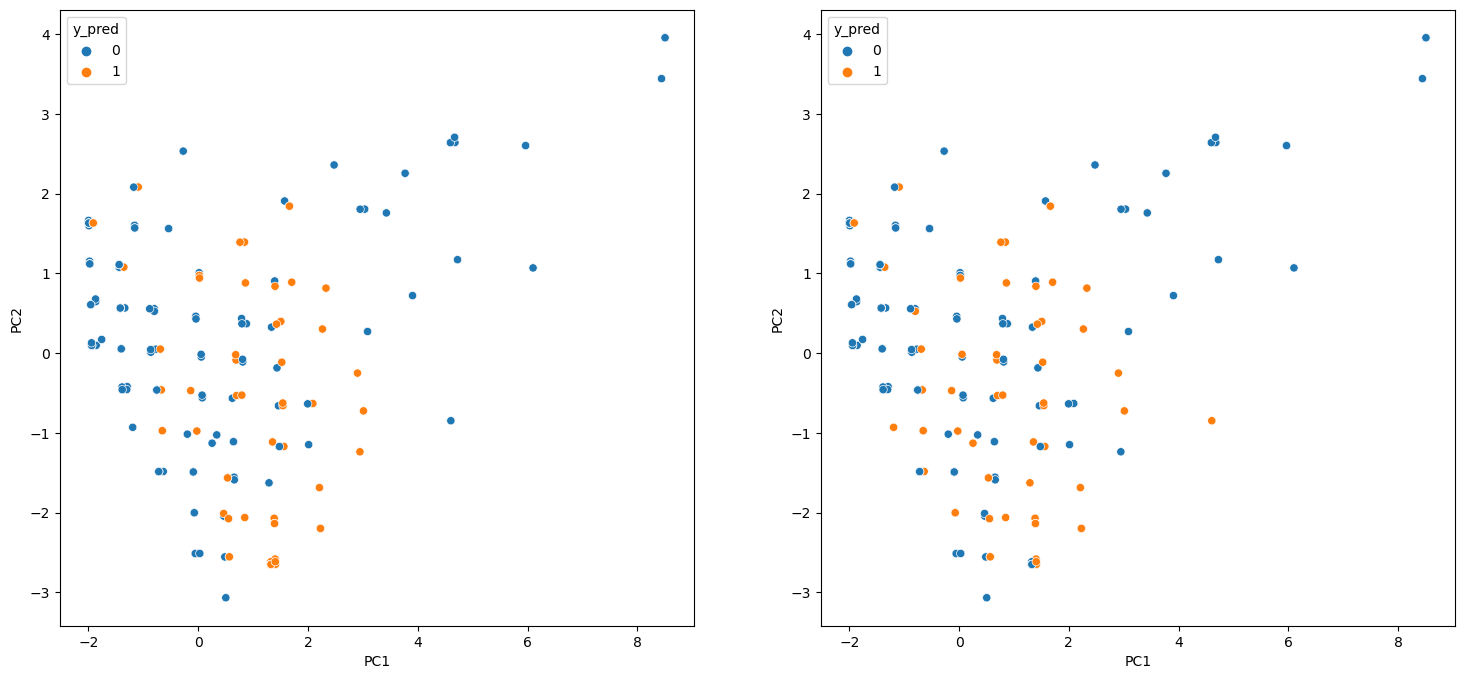

In [37]:
y_pred_1 = knn_1.predict(test_X)
y_pred_2 = knn_2.predict(test_X)

# Perform PCA on data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(test_X)


# Create a dataframe with PCA components and predicted labels
pca_df_1 = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df_1['y_pred'] = y_pred_1
pca_df_2 = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df_2['y_pred'] = y_pred_2

# Plot clusters using seaborn
f, ax = plt.subplots(1, 2, figsize=(18,8))

sns.scatterplot(data=pca_df_1, x='PC1', y='PC2', hue='y_pred', ax=ax[0])
sns.scatterplot(data=pca_df_2, x='PC1', y='PC2', hue='y_pred', ax=ax[1])
plt.show()

# 🥇 Place in the leaderboard

This code loads a dataset called *titanic_lb* which contains the public leaderboard data for the Titanic Kaggle competition. The code then uses the **Counter** function from the Python collections module to count the frequency of each score in the dataset.

The code then creates a bar plot using **matplotlib** to display the distribution of the scores. The x-axis represents the range of possible scores between 0.6 and 0.85, and the y-axis represents the frequency of scores falling within each bin of width 0.004. The resulting plot gives an idea of how the scores were distributed on the public leaderboard during the competition.

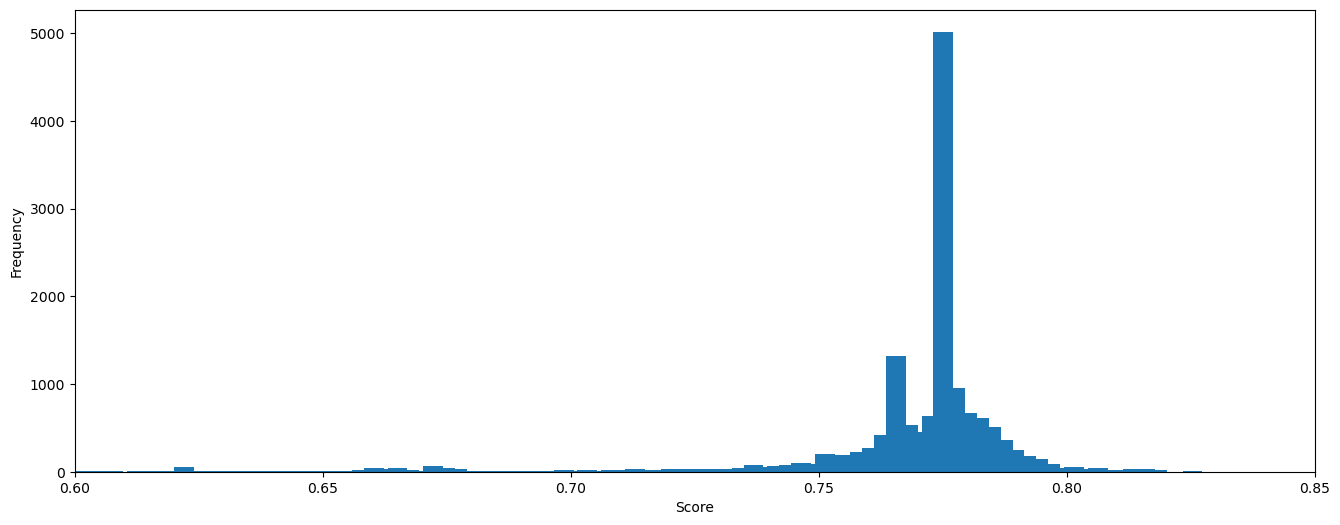

In [38]:
titanic_lb = pd.read_csv('../input/titanic-leaderboard/titanic-publicleaderboard.csv')
titanic_ct = Counter(titanic_lb["Score"])

plt.figure(figsize=(16,6))
plt.xlabel  ("Score")
plt.ylabel  ("Frequency")
plt.xlim((0.6,0.85))
plt.bar(titanic_ct.keys(), titanic_ct.values(), width=0.004)
plt.show()

This code snippet is counting the number of submissions in the *titanic_lb* dataset that have a score equal to or greater than **0.81818**.

The code first initializes a variable called *sum* to zero. It then loops through each key in the *titanic_ct* dictionary (which contains the frequency of each score in the dataset). If the key (score) is greater than or equal to **0.81818**, then the value (frequency) associated with that key is added to the *sum* variable.

Finally, the code prints out the value of the *sum* variable, which represents the total number of submissions with a score of **0.81818** or higher in the dataset.

In [39]:
# sum the number of submissions with a score > 0.81818
sum = 0
for key in titanic_ct:
    if key >= 0.81818:
        sum = sum + titanic_ct[key]
print("Number of submissions whose score is equal or greater than 0.81818 is:",sum)

Number of submissions whose score is equal or greater than 0.81818 is: 133


We now remove the 'perfect' scores from our tally, as they are basically rubbish.

In [40]:
# take away the 1.00000 bin
correct_sum = sum - titanic_ct[1.0]
print("less those with a perfect 1.00000 is:", correct_sum)

less those with a perfect 1.00000 is: 54


This code calculates the percentage of submissions in the Titanic Kaggle competition with a score of **0.81818** or higher, which is a commonly used threshold for a good performing model.

The first step is to calculate the number of submissions with a score of **0.81818** or higher, which was previously computed and stored in the variable *correct_sum*.

Next, the code calculates the percentage of these submissions by dividing *correct_sum* by the total number of submissions and multiplying by 100. The result is rounded to 2 decimal places using the **round()** function.

Finally, the percentage is printed along with some explanatory text.

In [41]:
percentage = ((100/titanic_lb.shape[0]) * correct_sum)
print("Submissions with a score of 0.81818 are in the top", 
      str(round(percentage, 2)),"%")

Submissions with a score of 0.81818 are in the top 0.35 %


# 📤 Submission

This code creates a DataFrame called *output* which contains the passenger IDs from the test dataset as the first column. Then, it adds the predicted *Survived* values from the *y_pred* array as the second column. Finally, it exports this DataFrame to a CSV file called **submission.csv** which is saved in the current working directory. This file can be submitted to the Kaggle competition for evaluation.

In [42]:
output = pd.DataFrame(pd.read_csv("../input/titanic/test.csv")['PassengerId'])
output['Survived'] = y_pred
output.to_csv("../working/submission.csv", index = False)

# 📝 Note of the author

Firstly, I would like to express my sincerest gratitude to all of you who took the time to read this notebook. I am a French engineering student studying Data Science and I am still inexperienced in this field. I am always looking to improve, and I would love to hear your thoughts on how I can make this notebook and/or predictive model even better. So please, feel free to reach out to me with any comments or suggestions. If you found this notebook helpful or interesting, please consider upvoting it. Your support means the world to me, and it will encourage me to continue sharing my work with the community.

Thank you once again for your time and for being a part of my learning journey. **--Lucas**

> #### Check out my other cool notebook !
> - [🛳️ Titanic EDA and Prediction [0.78229]](https://www.kaggle.com/code/dreygaen/titanic-eda-and-prediction-0-78229)

# 👏 Credits

- [KONSTANTIN](https://www.kaggle.com/code/konstantinmasich/titanic-0-82-0-83) for the ideas.
- [S.XU](https://www.kaggle.com/code/shunjiangxu/blood-is-thicker-than-water-friendship-forever/notebook) for the family grouping.
- [CARL MCBRIDE ELLIS](https://www.kaggle.com/code/carlmcbrideellis/titanic-leaderboard-a-score-0-8-is-great) for the leaderboard filtering idea

[Back to the top](#🛳️-Titanic---Top-1%-with-KNN-[0.81818])